In [2]:
!git clone https://github.com/MohamedKhalifa1/Stack-Overflow-Annual-Developer-Survey-Analysis.git

Cloning into 'Stack-Overflow-Annual-Developer-Survey-Analysis'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 105 (delta 25), reused 44 (delta 13), pack-reused 47
Receiving objects: 100% (105/105), 31.36 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [3]:
!unzip /content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/01_preprocessed_data.zip

Archive:  /content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed/01_preprocessed_data.zip
  inflating: content/01_preprocessed_data.pkl  


In [133]:
DATA_PATH = '/content/content/01_preprocessed_data.pkl'
EXPORT_FEATURES_DIR = "/content/Stack-Overflow-Annual-Developer-Survey-Analysis/data/preprocessed"
IMAGES_PATH = '/content/Stack-Overflow-Annual-Developer-Survey-Analysis/img'

In [5]:
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

# Import Librabries



In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.preprocessing import StandardScaler , MultiLabelBinarizer
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import os
import yaml

In [7]:
raw_df = pd.read_pickle(DATA_PATH)

In [8]:
raw_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,[],NaN,[],NaN,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,"[Hobby, Contribute to open-source projects, Bo...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,"[Automated testing, Continuous integration (CI...",NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,"[Hobby, Contribute to open-source projects, Pr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,"[Microservices, Automated testing, Observabili...",Other,Appropriate in length,Neither easy nor difficult,23456.0


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           89184 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     89184 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            89184 non-null  object 
 9   LearnCodeOnline                      89184 non-null  object 
 10  LearnCodeCoursesCert                 89184 non-null  object 
 11  YearsCode                   

In [10]:
raw_df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,87435.000000,66136.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,13.977926,11.266194,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,10.538807,9.211307,2.276847e+44,9.051989,6.814188e+05
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.000000,4.000000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,11.000000,9.000000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,20.000000,16.000000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,51.000000,51.000000,5.000000e+46,50.000000,7.435143e+07


In [11]:
df = raw_df.copy()

In [12]:
dfs_encoded = {}
for col in ROLE_COLS + TECH_COLS:
    df[col].fillna('', inplace = True)
    df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [x] if pd.notnull(x) else [])
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(
        binarizer.fit_transform(df[col]),
        columns = binarizer.classes_,
        index = df.index)
    dfs_encoded[col] = encoded_df

In [13]:
df = pd.concat(dfs_encoded , axis = 1)

In [14]:
df.head()

DevType                                                               \
          Academic researcher Blockchain Cloud infrastructure engineer   
0       1                   0          0                             0   
1       0                   0          0                             0   
2       0                   0          0                             0   
3       0                   0          0                             0   
4       0                   0          0                             0   

                                                                          \
  Data or business analyst Data scientist or machine learning specialist   
0                        0                                             0   
1                        0                                             0   
2                        0                                             0   
3                        0                                             0   
4                        0                                             0   

                                                                        ...  \
  Database administrator Designer DevOps specialist Developer Advocate  ...   
0                      0        0                 0                  0  ...   
1                      0        0                 0                  0  ...   
2                      0        0                 0                  0  ...   
3                      0        0                 0                  0  ...   
4                      0        0                 0                  0  ...   

  NEWCollabToolsHaveWorkedWith                                     \
                        Spyder Sublime Text TextMate VSCodium Vim   
0                            0            0        0        0   0   
1                            0            0        0        0   1   
2                            0            0        0        0   0   
3                            0            0        0        0   1   
4                            0            0        0        0   1   

                                                         
  Visual Studio Visual Studio Code WebStorm Xcode condo  
0             0                  0        0     0     0  
1             0                  1        0     0     0  
2             0                  0        0     0     0  
3             0                  1        1     0     0  
4             0                  1        0     0     0  

[5 rows x 304 columns]

# Dimensionality reduction

In [52]:
skills_df = df.drop('DevType', axis = 1).copy()

In [53]:
std_skills = StandardScaler().fit_transform(skills_df)

In [17]:
std_skills

array([[-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ],
       [-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ],
       [-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ],
       ...,
       [-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ],
       [-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ],
       [-0.0502917 , -0.0874592 , -0.080837  , ..., -0.27776516,
        -0.3177777 , -0.0413189 ]])

In [54]:
tsne_projection = TSNE(n_components=2,
                       perplexity=3,
                       learning_rate=0.01,
                       init='pca',
                       method='barnes_hut',
                       n_jobs=2,
                       n_iter=10**10,
                       random_state=0).fit_transform(std_skills.T)
tsne_projection = pd.DataFrame(tsne_projection, index=skills_df.columns)


In [19]:
tsne_projection

0          1
LanguageHaveWorkedWith       APL                       9.537419 -24.494493
                             Ada                      10.991712 -23.790903
                             Apex                     13.590502  -2.814792
                             Assembly                -12.764229 -40.727493
                             Bash/Shell (all shells) -17.608345 -35.070827
...                                                         ...        ...
NEWCollabToolsHaveWorkedWith Visual Studio            48.838547  -8.534323
                             Visual Studio Code       13.093545  51.775501
                             WebStorm                 31.385109 -19.585274
                             Xcode                   -34.149921  31.046530
                             condo                     0.142006 -14.361937

[270 rows x 2 columns]

In [20]:
fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1000, title_text='TSNE')
fig.show()

# Clusters


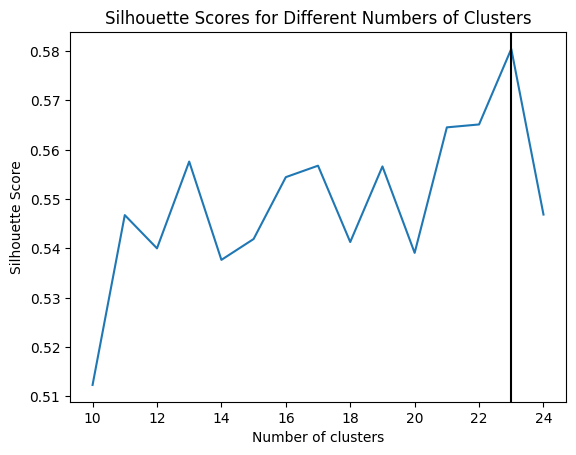

The best number of clusters is: 23


In [26]:
range_n_clusters = list(range(10, 25))
silhouette_scores = []
best_cluster_model = None

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_projection)

    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg >= np.max(silhouette_scores):
        best_cluster_model = kmeans
plt.plot(range_n_clusters, silhouette_scores)
plt.axvline(best_cluster_model.n_clusters, color='black')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'The best number of clusters is: {best_n_clusters}')

In [29]:
cluster_labels = [
    'skills_group_'+str(label) for label in best_cluster_model.labels_
]

In [134]:
fig = px.scatter(x = tsne_projection[0], y = tsne_projection[1], text = tsne_projection.droplevel(0).index, color = cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1000, title_text='Clusters')
fig.show()
fig.write_html(f'{IMAGES_PATH}/skills_cluster_group.html')

In [42]:
skills_clusters = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)
skills_clusters

skills_group_0     [SAS, Clickhouse, Cockroachdb, DuckDB, RavenDB...
skills_group_1     [Elixir, Erlang, Ruby, Fly.io, Phoenix, Ruby o...
skills_group_10    [Dart, BigQuery, Cloud Firestore, Firebase Rea...
skills_group_11    [Bash/Shell (all shells), Lua, Rust, Tauri, Ca...
skills_group_12           [GDScript, Godot, Unity 3D, Unreal Engine]
skills_group_13    [PHP, MariaDB, MySQL, SQLite, Solr, Managed Ho...
skills_group_14    [Delphi, VBA, Visual Basic (.Net), Firebird, M...
skills_group_15    [Solidity, Supabase, Heroku, Netlify, Render, ...
skills_group_16    [Dynamodb, Elasticsearch, InfluxDB, Neo4J, Pos...
skills_group_17      [Angular, AngularJS, Capacitor, Cordova, Ionic]
skills_group_18    [Cloudflare, Digital Ocean, Hetzner, Linode, n...
skills_group_19    [Clojure, Haskell, Lisp, Nim, Prolog, Zig, Dat...
skills_group_2     [HTML/CSS, JavaScript, TypeScript, MongoDB, Ex...
skills_group_20       [Objective-C, Swift, SwiftUI, Homebrew, Xcode]
skills_group_21                   

In [43]:
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

skills_group_0
['SAS', 'Clickhouse', 'Cockroachdb', 'DuckDB', 'RavenDB', 'TiDB', 'Colocation', 'Elm', 'Lit', 'Qwik', 'Solid.js', 'JAX', 'Uno Platform', 'Boost.Test', 'CUTE', 'ELFspy', 'Pulumi', 'SCons', 'Wasmer', 'bandit', 'build2', 'cppunit', 'doctest', 'lest', 'liblittletest', 'snitch', 'tunit', 'BBEdit', 'Micro', 'Nova', 'TextMate', 'condo']
skills_group_1
['Elixir', 'Erlang', 'Ruby', 'Fly.io', 'Phoenix', 'Ruby on Rails', 'RubyMine']
skills_group_10
['Dart', 'BigQuery', 'Cloud Firestore', 'Firebase Realtime Database', 'Firebase', 'Google Cloud', 'Flutter']
skills_group_11
['Bash/Shell (all shells)', 'Lua', 'Rust', 'Tauri', 'Cargo', 'Nix', 'Pacman', 'Geany', 'Helix', 'Kate', 'Nano', 'Neovim', 'VSCodium']
skills_group_12
['GDScript', 'Godot', 'Unity 3D', 'Unreal Engine']
skills_group_13
['PHP', 'MariaDB', 'MySQL', 'SQLite', 'Solr', 'Managed Hosting', 'CodeIgniter', 'Drupal', 'Laravel', 'Symfony', 'WordPress', 'jQuery', 'Composer', 'PhpStorm']
skills_group_14
['Delphi', 'VBA', 'Visual 

# Create new features


In [78]:
new_features = []

for cluster, skills in skills_clusters.items():
    cluster_sum = skills_df.droplevel(0, axis=1)[skills].sum(axis=1)
    cluster_sum.name = cluster
    new_features.append(cluster_sum)

fe_clustered_skills = pd.concat(new_features, axis=1)

In [90]:
skills_df.droplevel(0, axis=1)[skills].sum(axis=1)

0        0
1        0
2        0
3        1
4        0
        ..
89179    9
89180    6
89181    0
89182    3
89183    0
Length: 89184, dtype: int64

In [93]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,...,skills_group_20,skills_group_21,skills_group_22,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,7,3,0,...,0,0,0,0,1,0,2,0,0,0
2,0,0,1,4,0,0,0,0,4,0,...,0,1,0,1,1,0,0,0,0,0
3,0,2,0,1,0,2,0,2,2,0,...,1,0,1,1,1,0,0,0,0,1
4,0,0,2,0,0,0,0,6,4,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,0,0,3,0,0,3,0,2,2,2,...,0,0,0,3,1,0,1,0,0,9
89180,0,0,2,0,0,0,0,0,2,0,...,0,0,0,1,0,0,5,0,0,6
89181,0,0,0,4,0,1,0,0,1,0,...,0,0,0,2,2,0,5,0,0,0
89182,0,0,1,3,0,4,0,3,5,0,...,1,0,0,7,1,0,5,0,0,3


In [98]:
fe_clustered_skills.idxmax(axis=1)

0         skills_group_0
1        skills_group_15
2        skills_group_11
3         skills_group_2
4         skills_group_2
              ...       
89179     skills_group_2
89180     skills_group_9
89181     skills_group_6
89182     skills_group_2
89183     skills_group_3
Length: 89184, dtype: object

In [100]:
combined_features_df = pd.concat([fe_clustered_skills,
                                  skills_df.droplevel(0,axis=1)],
                                 axis=1)
roles_df = df['DevType'].copy()

In [105]:
roles_df

,,Academic researcher,Blockchain,Cloud infrastructure engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89181,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
combined_features_df

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,...,Spyder,Sublime Text,TextMate,VSCodium,Vim,Visual Studio,Visual Studio Code,WebStorm,Xcode,condo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,7,3,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,4,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,1,0,2,0,2,2,0,...,0,0,0,0,1,0,1,1,0,0
4,0,0,2,0,0,0,0,6,4,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,0,0,3,0,0,3,0,2,2,2,...,0,1,0,0,0,1,1,0,0,0
89180,0,0,2,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
89181,0,0,0,4,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
89182,0,0,1,3,0,4,0,3,5,0,...,0,0,0,0,1,1,1,0,0,0


In [127]:
features_path = os.path.join(EXPORT_FEATURES_DIR, "02_features_skills_clusters.pkl")
fe_clustered_skills.to_pickle(features_path)

In [132]:
description_path = os.path.join(EXPORT_FEATURES_DIR, "03_features_skills_clusters_description.yaml")
with open(description_path, 'w') as outfile:
    yaml.dump(skills_clusters.to_dict(), outfile)